# Characterization of Discrete Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Phase and Group Delay

The [phase and group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay) characterize the phase and delay properties of an LTI system. Both quantify the frequency dependent delay that is imprinted on a signal when passing through a system. In many applications the delay introduced by a system should be as small as possible or within reasonable limits.

### Phase Delay

For an linear time-invariant (LTI) system with transfer function $H(e^{j \Omega})$ the phase delay is defined as follows

\begin{equation}
t_p(\Omega) = - \frac{\varphi(e^{j \Omega})}{\Omega}
\end{equation}

where $\varphi(e^{j \Omega}) = \arg \{ H(e^{j \Omega}) \}$ denotes the phase of the transfer function. The phase delay quantifies the delay of a single harmonic exponential signal $e^{j \Omega k}$ with normalized frequency $\Omega$ when passing through the system. The negative sign in the definition of the phase delay results in a positive phase delay $t_p(\Omega) > 0$ when a signal is delayed by a system. Note that the phase delay may not be defined for $\Omega = 0$.

**Example**

The phase delay $t_p(\omega)$ for the before introduced [second-order recursive LTI system](difference_equation.ipynb#Second-Order-System) with transfer function

\begin{equation}
H(z) = \frac{1}{\frac{1}{2} z^{-2} - z^{-1} + 1}
\end{equation}

is computed. First the transfer function is defined

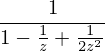

In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

z = sym.symbols('z', complex=True)
W = sym.symbols('Omega', real=True)
H = 1 / (sym.Rational(1, 2)*z**(-2) - z**(-1) + 1)
H

Now the phase delay $t_p(\Omega)$ is computed and plotted for illustration

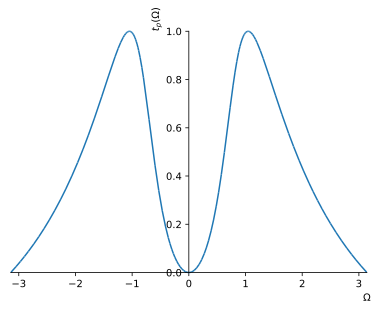

In [2]:
phi = sym.arg(H.subs(z, sym.exp(sym.I*W)))
tp = -phi/W

sym.plot(tp, (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$t_p(\Omega)$')

### Group Delay

The group delay is defined as the derivative of the phase with respect to the frequency

\begin{equation}
t_g(\Omega) = - \frac{d \varphi(e^{j \Omega})}{d \Omega}
\end{equation}

The group delay quantifies the delay the amplitude envelope of a group of exponential signals observes when passing through a system. The negative sign in above definition results in a positive group delay for a system imposing a delay onto the input signal. Note that the [phase](https://en.wikipedia.org/wiki/Instantaneous_phase) $\varphi(e^{j \Omega})$ is in general only unique for $- \pi < \varphi(e^{j \Omega}) \leq \pi$. If the phase exceeds this range it is wrapped back. For meaningful results it is required to unwrap the phase before computing the group delay.

**Example**

The group delay $t_g(e^{j \Omega})$ of above second-order recursive system is computed and plotted

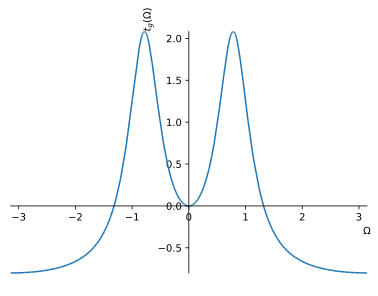

In [3]:
tg = - sym.diff(phi, W)
sym.plot(tg, (W, -sym.pi, sym.pi), xlabel='$\Omega$', ylabel='$t_g(\Omega)$')

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.